<a href="https://colab.research.google.com/github/cherlimSG/DL/blob/main/DL_BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Effect of BatchNorm#

This notebook is designed to investigate the effect of applying BatchNorm to a fully connected layer neural network.

#Import nessessary libraries

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sklearn.datasets

import keras 
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation

from keras import initializers, regularizers, optimizers

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
def load_dataset():
    np.random.seed(1)
    X_train, y_train = sklearn.datasets.make_circles(n_samples = 500, noise = .1)
    np.random.seed(2)
    X_test, y_test = sklearn.datasets.make_circles(n_samples = 500, noise = .1)
    
    # Visualize the data
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 40, cmap = plt.cm.Spectral);
    
    return X_train, y_train, X_test, y_test

#Dataset

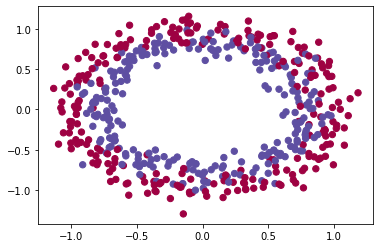

In [ ]:
# load image dataset
X_train, y_train, X_test, y_test = load_dataset()

#Activity 1: to see a change in number of parameters when using BN

- Build `model1` which has only one hidden layer with $50$ neurons and `ReLU`

- Display number of trainable parameters of `model1`: `model1.count_params()`

In [ ]:
model1 = Sequential()
model1.add(Dense(50, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='sigmoid'))


In [ ]:
print("# of trainable params of model1 = ", model1.count_params())

# of trainable params of model1 =  201


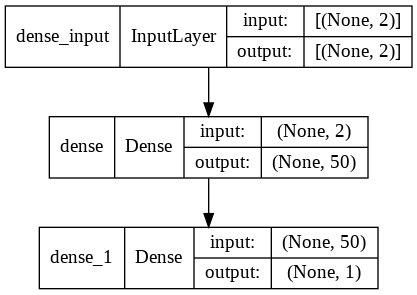

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


- Build `model2` which has only one hidden layer with $50$ neurons and `ReLU`

- After this hidden layer, add a `BatchNormalization()` layer

- Display number of trainable parameters of `model2`

In [ ]:
model2 = Sequential()
model2.add(Dense(50, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid'))

print("# of trainable params of model2 = ", model2.count_params())

# of trainable params of model2 =  401


#Activity 2: train the two models

In [ ]:
import tensorflow

In [ ]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = tensorflow.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
              metrics = ['accuracy'])
history1 = model1.fit(X_train,y_train,  validation_data = (X_test, y_test), epochs = 100, verbose = 0)

In [ ]:
model2.compile(loss = 'binary_crossentropy',
              optimizer = tensorflow.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
              metrics = ['accuracy'])
history2 = model2.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)

#Activity 3: compare the two models on convergence speed

##Plot `accuracy` and `val_accuracy` of `model1`

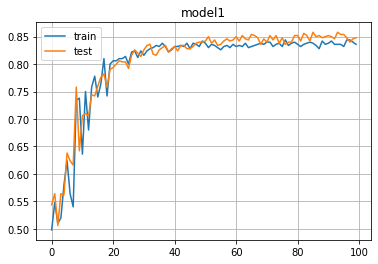

In [ ]:
# plot history
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.title('model1')
plt.grid()
plt.legend()
plt.show()

##Plot `accuracy` and `val_accuracy` of `model2`

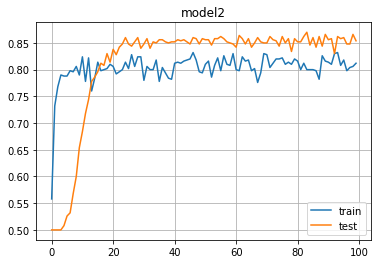

In [ ]:
# plot history
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.title('model2')
plt.grid()
plt.legend()
plt.show()

##Plot `accuracy` of `model1` and `model2`

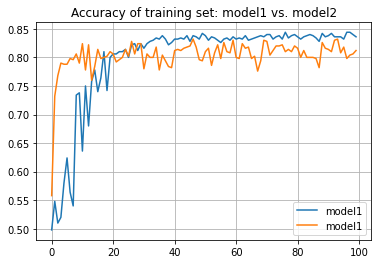

In [ ]:
# plot history
plt.plot(history1.history['accuracy'], label='model1')
plt.plot(history2.history['accuracy'], label='model1')
plt.title('Accuracy of training set: model1 vs. model2')
plt.grid()
plt.legend()
plt.show()

#Activity 4: Build `model3`. Place BN layer before activation function of the hidden layer

Note: 

- When adding the hidden layer to `model3`, do not specify `activation = ...`

- After BN layer, add activation layer by `...add(Activation('relu'))`

In [ ]:
model3 = Sequential()

model3 = Sequential()
model3.add(Dense(50, input_dim=2,kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dense(1, activation='sigmoid'))

print("# of trainable params of model3 = ", model3.count_params())

# of trainable params of model3 =  401


In [ ]:
model3.compile(loss = 'binary_crossentropy',
              optimizer = tensorflow.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9),
              metrics = ['accuracy'])
history3 = model3.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)


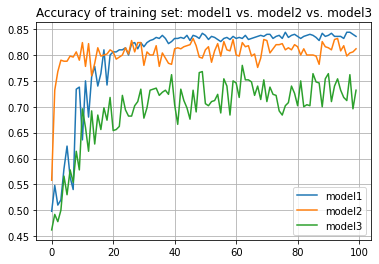

In [ ]:
# plot history
plt.plot(history1.history['accuracy'], label='model1')
plt.plot(history2.history['accuracy'], label='model2')
plt.plot(history3.history['accuracy'], label='model3')
plt.title('Accuracy of training set: model1 vs. model2 vs. model3')
plt.grid()
plt.legend()
plt.show()

<font color="red"> NOTE: you may find that placing BN after activation function has better performance. But DO NOT GENERALIZE this observation. It is true for this *particular* dataset and the *ANN structure (1 hidden layer with 50 neurons)* </ font>

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                150       
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 401
Trainable params: 301
Non-trainable params: 100
_________________________________________________________________


In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                150       
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 401
Trainable params: 301
Non-trainable params: 100
_________________________________________________________________
